In [118]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import localtime, strftime

In [119]:
training_epochs = 5000
display_step = 100
# n_idle_epochs = 1000
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=n_idle_epochs, min_delta=0.00001)

def scheduler(epoch, lr):
    if lr <= 0.01:
        return lr
    if epoch % 200 == 0:
        return lr * 0.8
    else:
        return lr

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [120]:
class NEPOCHLogger(tf.keras.callbacks.Callback):
    def __init__(self, per_epoch=100):
        super(NEPOCHLogger, self).__init__()
        self.seen = 0
        self.per_epoch = per_epoch

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.per_epoch == 0:
            print('Epoch {}, loss {:.8f}, train_accuracy {:.8f}'.format(epoch, logs['loss'], logs['acc']))

log_display = NEPOCHLogger(per_epoch=display_step)

In [121]:
train_data = pd.read_csv(r'two_spiral_train_data.txt', header=None, sep='\s+')
test_data = pd.read_csv(r'two_spiral_test_data.txt', header=None, sep='\s+')

train_X = tf.convert_to_tensor(np.asarray(train_data.iloc[:, 0:2]))
train_y = tf.convert_to_tensor(np.asarray(train_data.iloc[:, 2]))
test_X = tf.convert_to_tensor(np.asarray(test_data.iloc[:, 0:2]))
test_y = tf.convert_to_tensor(np.asarray(test_data.iloc[:, 2]))

In [122]:
def plot_and_show(title, class_0, class_1, style_0, style_1, path, ms=6):
    plt.axes().set_facecolor('gray')
    plt.title(title)
    plt.plot(class_0[0].tolist(), class_0[1].tolist(), style_0, label='class 0', markersize=ms)
    plt.plot(class_1[0].tolist(), class_1[1].tolist(), style_1, label='class 1', markersize=ms)
    plt.savefig(path)
    plt.show()

In [123]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, input_shape=(2,), activation='swish'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

Epoch 0, loss 0.75322628, train_accuracy 0.64333332
Epoch 100, loss 0.56198210, train_accuracy 0.63999999
Epoch 200, loss 0.51193357, train_accuracy 0.64666665
Epoch 300, loss 0.52268004, train_accuracy 0.65666670
Epoch 400, loss 0.50962704, train_accuracy 0.65333331
Epoch 500, loss 0.51159650, train_accuracy 0.67000002
Epoch 600, loss 0.50364816, train_accuracy 0.65666670
Epoch 700, loss 0.49713507, train_accuracy 0.67000002
Epoch 800, loss 0.50028640, train_accuracy 0.68000001
Epoch 900, loss 0.49084961, train_accuracy 0.69000000
Epoch 1000, loss 0.49730718, train_accuracy 0.69999999
Epoch 1100, loss 0.49246618, train_accuracy 0.70999998
Epoch 1200, loss 0.50234270, train_accuracy 0.70333332
Epoch 1300, loss 0.49985218, train_accuracy 0.70666665
Epoch 1400, loss 0.48234487, train_accuracy 0.72000003
Epoch 1500, loss 0.49208999, train_accuracy 0.72666669
Epoch 1600, loss 0.48531228, train_accuracy 0.72333336
Epoch 1700, loss 0.48746878, train_accuracy 0.70666665
Epoch 1800, loss 0.484

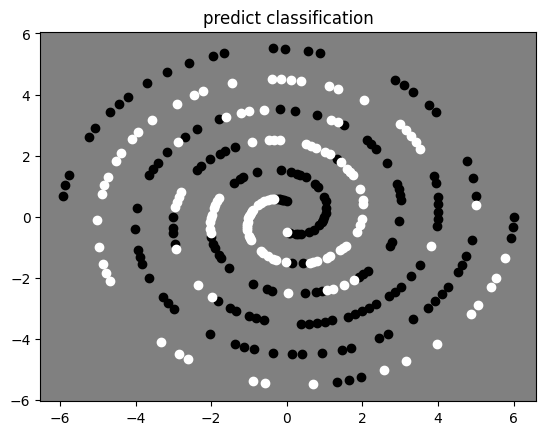

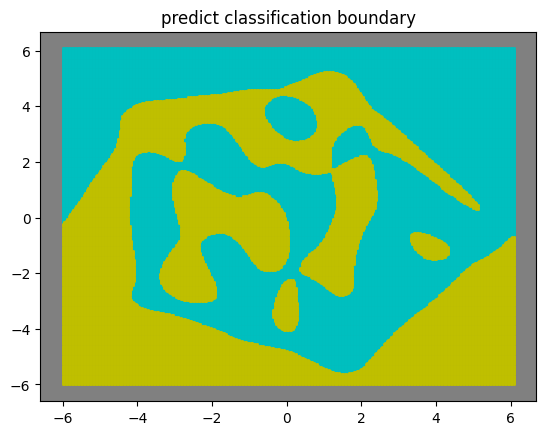

Epoch 0, loss 3.52136469, train_accuracy 0.66666669
Epoch 100, loss 0.44617102, train_accuracy 0.74333334
Epoch 200, loss 0.43731222, train_accuracy 0.77999997
Epoch 300, loss 0.44264597, train_accuracy 0.78333336
Epoch 400, loss 0.45348129, train_accuracy 0.77666664
Epoch 500, loss 0.44754380, train_accuracy 0.78333336
Epoch 600, loss 0.48655930, train_accuracy 0.75666666
Epoch 700, loss 0.47221518, train_accuracy 0.76999998
Epoch 800, loss 0.50338483, train_accuracy 0.71333331
Epoch 900, loss 0.49048412, train_accuracy 0.75000000
Epoch 1000, loss 0.48152983, train_accuracy 0.75000000
Epoch 1100, loss 0.43413112, train_accuracy 0.77666664
Epoch 1200, loss 0.44662863, train_accuracy 0.79666668
Epoch 1300, loss 0.69324833, train_accuracy 0.74333334
Epoch 1400, loss 0.55724245, train_accuracy 0.75333333
Epoch 1500, loss 0.56201255, train_accuracy 0.74333334
Epoch 1600, loss 0.51532477, train_accuracy 0.76333332
Epoch 1700, loss 0.52413779, train_accuracy 0.73666668
Epoch 1800, loss 0.519

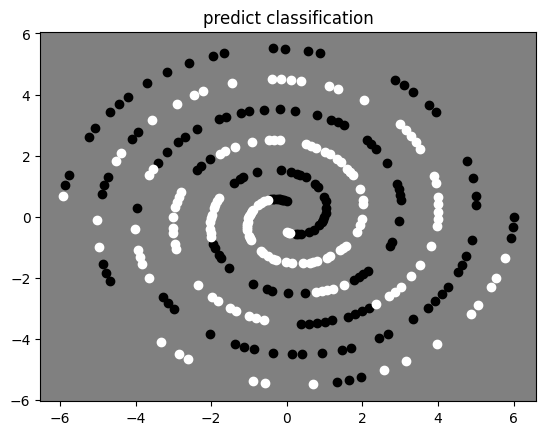

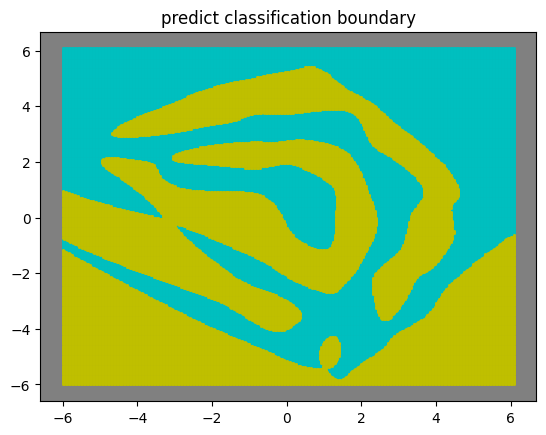

Epoch 0, loss 0.20956382, train_accuracy 0.90333331
Epoch 100, loss 0.19163178, train_accuracy 0.90333331
Epoch 200, loss 0.18685892, train_accuracy 0.89999998
Epoch 300, loss 0.18186916, train_accuracy 0.90333331
Epoch 400, loss 0.17802548, train_accuracy 0.90333331
Epoch 500, loss 0.17601091, train_accuracy 0.90333331
Epoch 600, loss 0.17351618, train_accuracy 0.89666665
Epoch 700, loss 0.17075056, train_accuracy 0.90333331
Epoch 800, loss 0.16870521, train_accuracy 0.91000003
Epoch 900, loss 0.16420569, train_accuracy 0.89666665
Epoch 1000, loss 0.16427393, train_accuracy 0.90666670
Epoch 1100, loss 0.16126327, train_accuracy 0.91000003
Epoch 1200, loss 0.15772398, train_accuracy 0.92000002
Epoch 1300, loss 0.15716203, train_accuracy 0.91333336
Epoch 1400, loss 0.15607545, train_accuracy 0.91666669
Epoch 1500, loss 0.15375240, train_accuracy 0.91333336
Epoch 1600, loss 0.15442789, train_accuracy 0.92000002
Epoch 1700, loss 0.15032190, train_accuracy 0.92000002
Epoch 1800, loss 0.149

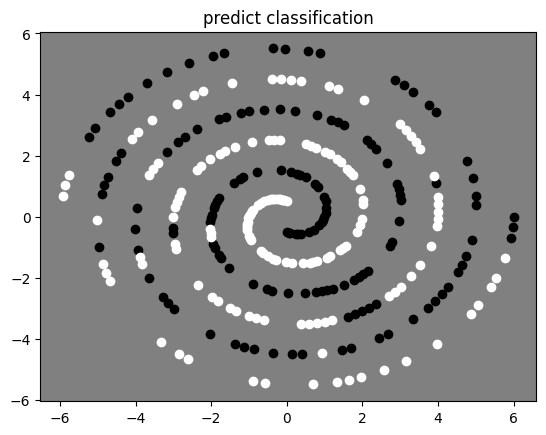

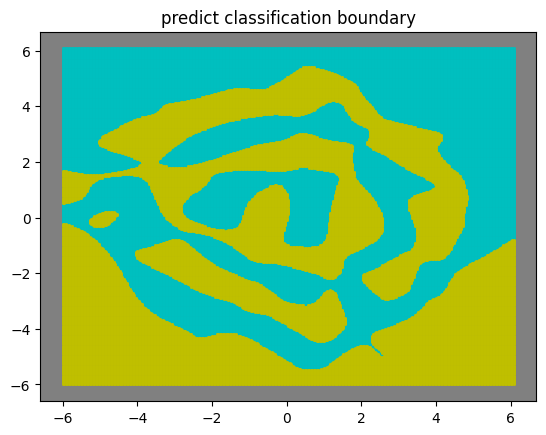

Epoch 0, loss 0.03076357, train_accuracy 0.99000001
Epoch 100, loss 0.02127428, train_accuracy 1.00000000
Epoch 200, loss 0.02132857, train_accuracy 1.00000000
Epoch 300, loss 0.02117028, train_accuracy 1.00000000
Epoch 400, loss 0.02134477, train_accuracy 1.00000000
Epoch 500, loss 0.02155886, train_accuracy 1.00000000
Epoch 600, loss 0.02135708, train_accuracy 1.00000000
Epoch 700, loss 0.02131450, train_accuracy 1.00000000
Epoch 800, loss 0.02141668, train_accuracy 1.00000000
Epoch 900, loss 0.02127558, train_accuracy 1.00000000
Epoch 1000, loss 0.02123333, train_accuracy 1.00000000
Epoch 1100, loss 0.02120876, train_accuracy 0.99666667
Epoch 1200, loss 0.02134395, train_accuracy 1.00000000
Epoch 1300, loss 0.02109713, train_accuracy 1.00000000
Epoch 1400, loss 0.02108081, train_accuracy 1.00000000
Epoch 1500, loss 0.02111484, train_accuracy 0.99666667
Epoch 1600, loss 0.02117951, train_accuracy 1.00000000
Epoch 1700, loss 0.02125950, train_accuracy 1.00000000
Epoch 1800, loss 0.021

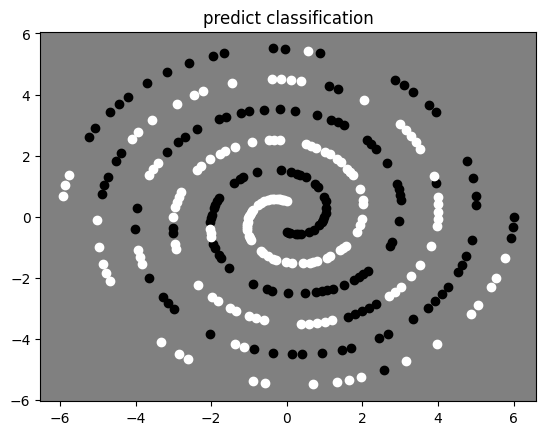

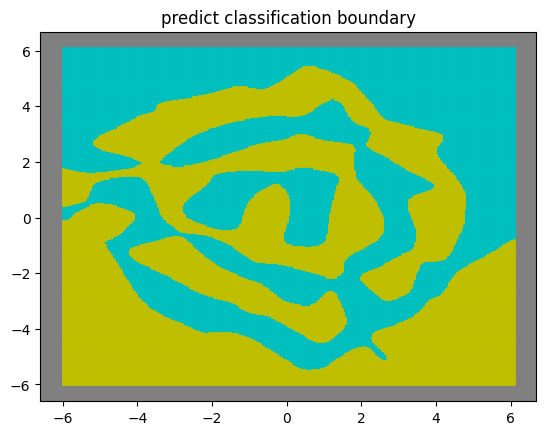

In [125]:
i = 0
time_str = strftime("%Y%m%d%H%M%S", localtime())
for lr in [0.1, 0.1, 0.01, 0.001]:  # compare different learning_rate
    optimizer = tf.keras.optimizers.SGD(lr)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
    if i == 0:
         history = model.fit(train_X, train_y, epochs=training_epochs * 9, verbose=0, batch_size=16, callbacks=[log_display, reduce_lr])  # dynamic learning rate
    else:
        history = model.fit(train_X, train_y, epochs=training_epochs * 9, verbose=0, batch_size=16, callbacks=[log_display])  # fixed learning rate
    i += 1
    evaluate = model.evaluate(test_X, test_y, verbose=0)
    print("Train Finished!", "test [loss, acc] =", evaluate)
    with open ('outputs/mlp/evaluation-' + time_str +'.txt', 'a+') as f:
        f.write('entropy, accuracy for train data: ' +
                str(history.history['loss'][-1]) + ' ' +
                str(history.history['acc'][-1]) + '\n')
        f.write('entropy, accuracy for test data: ' +  str(evaluate) + '\n\n')

    # plot predict classification for test data
    y_hat = np.argmax(model.predict(test_X, verbose=0), axis=1)
    class_0, class_1 = test_data[y_hat == 0].iloc[:, 0:2], test_data[y_hat == 1].iloc[:, 0:2]
    plot_and_show('predict classification', class_0, class_1, 'ko', 'wo', 'outputs/mlp/images/predict-' + str(i) + '-'  + time_str + '.png')

    # plot boundary
    X = pd.DataFrame([[x, y] for x in np.arange(-6, 6.1, 0.04) for y in np.arange(-6, 6.1, 0.04)])
    y_hat = np.argmax(model.predict(tf.convert_to_tensor(X), verbose=0), axis=1)
    class_0, class_1 = X[y_hat == 0].iloc[:, 0:2], X[y_hat == 1].iloc[:, 0:2]
    plot_and_show('predict classification boundary', class_0, class_1, 'cs', 'ys', 'outputs/mlp/images/boundary-' + str(i) + '-'  + time_str + '.png', ms=1)